In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
from data_sort import dz_clean, daz_clean, dbz_clean

In [78]:
clean_data_functions_dict = {0 :dz_clean(),
                             1 :daz_clean(),
                             2 :dbz_clean()}
clean_data_names_dict = {0 :"DZ type White Dwarfs",
                         1 :"DAZ type White Dwarfs",
                         2 :"DBZ type White Dwarfs"}
# print(clean_data_functions_dict.get(2))


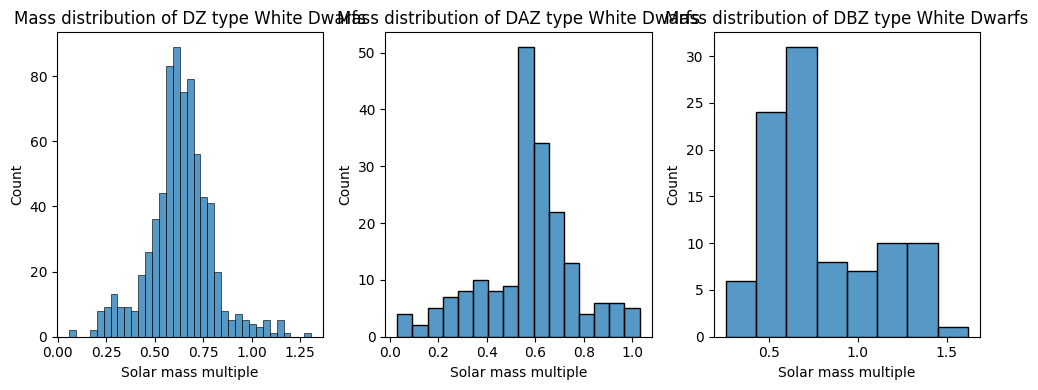

In [79]:
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
for i in range(len(clean_data_functions_dict)):
  sns.histplot(clean_data_functions_dict.get(i)['mass'],ax=axis[i])
  axis[i].set_xlabel("Solar mass multiple")
  axis[i].set_title(f"Mass distribution of {clean_data_names_dict.get(i)}")
  plt.tight_layout()
plt.show()


In [80]:
first_and_last_column_indices =dict()                        # create dictionary

for i in range(len(clean_data_functions_dict)):                                               # we only need data in columns from 'loghhe' to 'logsrhe'(including themselves)
    first_column_index =clean_data_functions_dict.get(i).columns.get_loc('loghhe')            # To know index of first and last columns of data we need from each file
    last_column_index = clean_data_functions_dict.get(i).columns.get_loc('logsrhe')          
    first_and_last_column_indices[i]=[first_column_index ,last_column_index]

first_and_last_column_indices

{0: [9, 27], 1: [9, 43], 2: [9, 31]}

In [81]:
from scipy.stats import pearsonr
import numpy as np

In [82]:
for i in range(len(clean_data_functions_dict)):
    # print(f"""
    #       FOR THE {clean_data_names_dict.get(i)}
    #                                             """)
    for index, column in enumerate(clean_data_functions_dict.get(i).columns[first_and_last_column_indices[i][0]:first_and_last_column_indices[i][1] + 1]):       #this for loop gives index number to the columns from the starting column to the ending column in each file
        dz_clean_loc = clean_data_functions_dict.get(i).loc[:,column]
    
        def columns_correlation_with_mass(column) :
            drop_NaN_values =clean_data_functions_dict.get(i)[["mass",column]].dropna(axis=0)     # Select the 'mass' and the current column from the dataset. Drop the NaN values if present in any of their rows
            drop_NaN_values["mass"] = pd.to_numeric(drop_NaN_values["mass"], errors='coerce')     # Convert both columns to numeric values,so non-numeric values like "<4.876" etc get converted into NaN
            drop_NaN_values[column] = pd.to_numeric(drop_NaN_values[column], errors='coerce')

            drop_NaN_values_again = drop_NaN_values.dropna(axis=0)                                # Drop rows with newly formed NaN values after conversion

            return drop_NaN_values_again
        
        if len(columns_correlation_with_mass(column=column)) < 2:                               # To not consider the faulty data
            # print(f"Not enough data for column {column}")
            continue

        correlation_mass, p_value_mass = pearsonr(columns_correlation_with_mass(column)["mass"], columns_correlation_with_mass(column)[column])
        # print(f"For {column} :Pearson correlation: {correlation}, P-value: {p_value}")

        # correlation_matrix = columns_with_only_numeric_rows(column)[["mass",column]].corr(numeric_only=True)    # For plotting correlation values
        # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        # plt.title(f'Correlation between Mass and Metal Pollution for {column}')
        # plt.show()

In [83]:
significant_metals_for_each_type = {0 :["logcahe","logmghe"],                   # These are the only metals which show significant correlation with mass as per the results obtained above. So we will analyze them further
                                    1 :"lognih",
                                    2 :"logcahe"}

In [84]:
significant_metals_for_each_type.values()

dict_values([['logcahe', 'logmghe'], 'lognih', 'logcahe'])

In [85]:
# for i in range(len(clean_data_functions_dict)):
#     dz_clean_loc = clean_data_functions_dict.get(i).loc[:,significant_metals_for_each_type.get(i)]
#     print(dz_clean_loc)
#     for j in significant_metals_for_each_type.get(i):
#         print(j)
    # for index, column in enumerate(clean_data_functions_dict.get(i).columns[]):  
    
        

    # if isinstance(significant_metals_for_each_type.get(i),list):
    #     for j in range(len(significant_metals_for_each_type.get(i))):
    #       print(columns_correlation_with_mass(column=significant_metals_for_each_type.get(i)[j]))
    # elif isinstance(significant_metals_for_each_type.get(i),str):
    #     print(columns_correlation_with_mass(column=significant_metals_for_each_type.get(i)))  

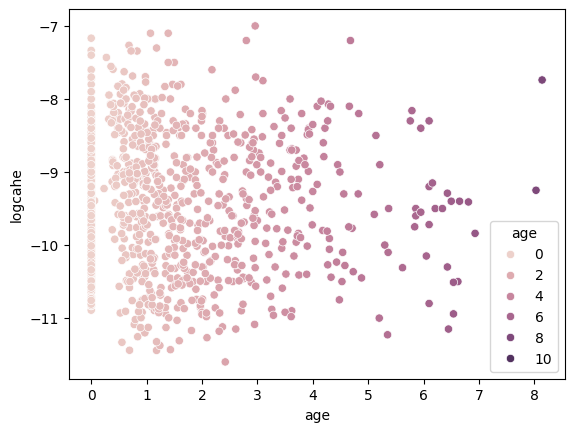

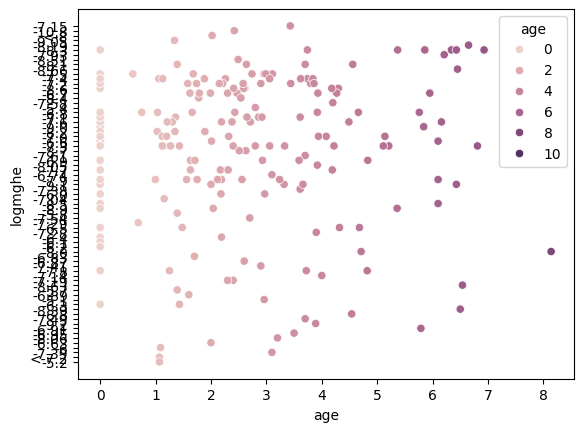

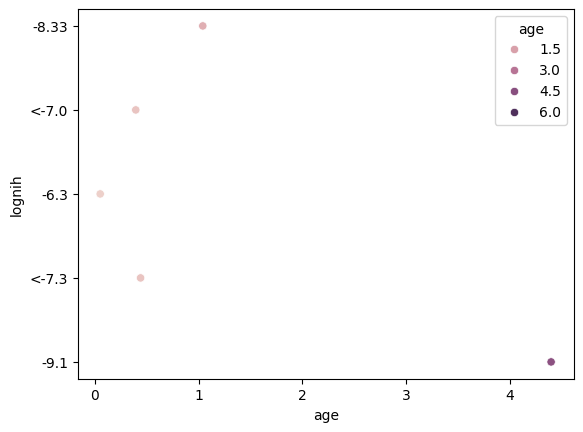

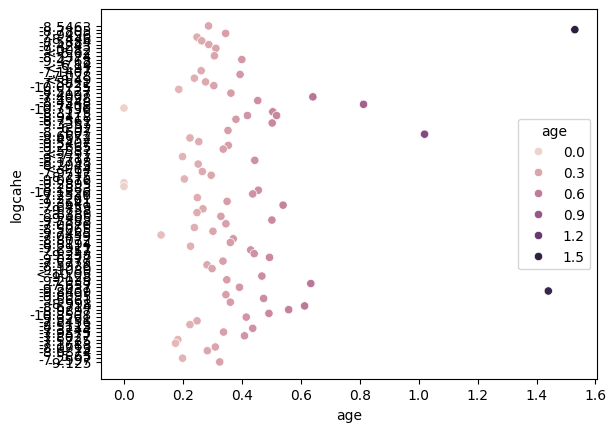

In [86]:
for i in range(len(clean_data_functions_dict)):
    if isinstance(significant_metals_for_each_type.get(i),list):
        sns.scatterplot(data=clean_data_functions_dict.get(i), x="age", y=f"{significant_metals_for_each_type.get(i)[0]}", hue="age")
        plt.show()
        
        sns.scatterplot(data=clean_data_functions_dict.get(i), x="age", y=f"{significant_metals_for_each_type.get(i)[1]}", hue="age")
        plt.show()

    elif isinstance(significant_metals_for_each_type.get(i),str):
        sns.scatterplot(data=clean_data_functions_dict.get(i), x="age", y=f"{significant_metals_for_each_type.get(i)}", hue="age") 
        plt.show()


In [87]:
# for i in range(len(clean_data_functions_dict)):
#     if isinstance(significant_metals_for_each_type.get(i),list):
#         for j in range(len(significant_metals_for_each_type.get(i))):
#             def columns_correlation_with_age():
            
#                 drop_NaN_values =clean_data_functions_dict.get(i).loc[["age",significant_metals_for_each_type.get(i)[j]]].dropna(axis=0)
#                 drop_NaN_values["age"] = pd.to_numeric(drop_NaN_values["age"], errors='coerce')                                                                       # Convert both columns to numeric values,so non-numeric values like "<4.876" etc get converted into NaN
#                 drop_NaN_values[significant_metals_for_each_type.get(i)[j]] = pd.to_numeric(drop_NaN_values[significant_metals_for_each_type.get(i)[j]], errors='coerce')
#                 drop_NaN_values_again = drop_NaN_values.dropna(axis=0) 
#                 return drop_NaN_values_again
#         # if len(columns_correlation_with_age()) < 2:                               # To not consider the faulty data
#         #     print(f"Not enough data for column {significant_metals_for_each_type.get(i)[j]}")
#         #     continue
#             correlation_age, p_value_age = pearsonr(columns_correlation_with_age()["age"], columns_correlation_with_age()[significant_metals_for_each_type.get(i)[j]])

#     elif isinstance(significant_metals_for_each_type.get(i),str):
#         def columns_correlation_with_age():
#             drop_NaN_values =clean_data_functions_dict.get(i).loc[["age",significant_metals_for_each_type.get(i)]].dropna(axis=0)
#             drop_NaN_values["age"] = pd.to_numeric(drop_NaN_values["age"], errors='coerce')  
#             drop_NaN_values[significant_metals_for_each_type.get(i)] = pd.to_numeric(drop_NaN_values[significant_metals_for_each_type.get(i)], errors='coerce')
#             drop_NaN_values_again = drop_NaN_values.dropna(axis=0) 
#             return drop_NaN_values_again
#         if len(columns_correlation_with_age()) < 2:                               # To not consider the faulty data
#             print(f"Not enough data for column {significant_metals_for_each_type.get(i)}")
#             continue
#     correlation_age, p_value_age = pearsonr(columns_correlation_with_age()["age"], columns_correlation_with_age()[significant_metals_for_each_type.get(i)])
#     print(f"For {column} :Pearson correlation: {correlation_age}, P-value: {p_value_age}")

In [88]:
for i in range(len(clean_data_functions_dict)):
    if isinstance(significant_metals_for_each_type.get(i), list):
        for j in range(len(significant_metals_for_each_type.get(i))):
            def columns_correlation_with_age():
                # Check if both "age" and metal column exist in the DataFrame
                available_columns = clean_data_functions_dict.get(i).columns
                if "age" not in available_columns or significant_metals_for_each_type.get(i)[j] not in available_columns:
                    print(f"Column {significant_metals_for_each_type.get(i)[j]} or 'age' not found in DataFrame {i}")
                    return pd.DataFrame()  # Return empty DataFrame if columns don't exist
                
                drop_NaN_values = clean_data_functions_dict.get(i).loc[:, ["age", significant_metals_for_each_type.get(i)[j]]].dropna(axis=0)
                drop_NaN_values["age"] = pd.to_numeric(drop_NaN_values["age"], errors='coerce')  # Convert age to numeric
                drop_NaN_values[significant_metals_for_each_type.get(i)[j]] = pd.to_numeric(drop_NaN_values[significant_metals_for_each_type.get(i)[j]], errors='coerce')  # Convert metal column to numeric
                drop_NaN_values_again = drop_NaN_values.dropna(axis=0)
                return drop_NaN_values_again
            
            # Proceed if there's enough data
            drop_NaN_values_again = columns_correlation_with_age()
            if len(drop_NaN_values_again) < 2:  # To not consider the faulty data
                print(f"Not enough data for column {significant_metals_for_each_type.get(i)[j]}")
                continue
            correlation_age, p_value_age = pearsonr(drop_NaN_values_again["age"], drop_NaN_values_again[significant_metals_for_each_type.get(i)[j]])
            print(f"For {significant_metals_for_each_type.get(i)[j]}: Pearson correlation: {correlation_age}, P-value: {p_value_age}")
    
    elif isinstance(significant_metals_for_each_type.get(i), str):
        def columns_correlation_with_age():
            available_columns = clean_data_functions_dict.get(i).columns
            if "age" not in available_columns or significant_metals_for_each_type.get(i) not in available_columns:
                print(f"Column {significant_metals_for_each_type.get(i)} or 'age' not found in DataFrame {i}")
                return pd.DataFrame()
            
            drop_NaN_values = clean_data_functions_dict.get(i).loc[:, ["age", significant_metals_for_each_type.get(i)]].dropna(axis=0)
            drop_NaN_values["age"] = pd.to_numeric(drop_NaN_values["age"], errors='coerce')
            drop_NaN_values[significant_metals_for_each_type.get(i)] = pd.to_numeric(drop_NaN_values[significant_metals_for_each_type.get(i)], errors='coerce')
            drop_NaN_values_again = drop_NaN_values.dropna(axis=0)
            return drop_NaN_values_again
        
        drop_NaN_values_again = columns_correlation_with_age()
        if len(drop_NaN_values_again) < 2:  # To not consider the faulty data
            print(f"Not enough data for column {significant_metals_for_each_type.get(i)}")
            continue
        correlation_age, p_value_age = pearsonr(drop_NaN_values_again["age"], drop_NaN_values_again[significant_metals_for_each_type.get(i)])
        print(f"For {significant_metals_for_each_type.get(i)}: Pearson correlation: {correlation_age}, P-value: {p_value_age}")


For logcahe: Pearson correlation: -0.023251117658216358, P-value: 0.4558065593766567
For logmghe: Pearson correlation: -0.26597142781852084, P-value: 3.106213859166333e-05
For lognih: Pearson correlation: -0.8477724769453245, P-value: 0.3558865336783016
For logcahe: Pearson correlation: -0.16590985868729785, P-value: 0.13387427121263862
